<a href="https://colab.research.google.com/github/mystic23/SCAPI/blob/main/Parcial_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Primer parcial de SCAPI
María Isabel Solá Valle
CIU: 200169403

#**Punto 1:**

Convertir el n ́umero real 50117/9900 a IEEE 754 de 32 bits. Muestre los 3 pasos del algoritmo


Pasos:

##**Paso 1:** Primeramente convertimos el numero 50117/9900 a binario

Primero sabemos que en decimal el numero  50117/9900 es = 5.062323232323232

Entonces empezamos por ahí, ya sabemos que el 5 en binario es 101

y para saber la parte decimal la cual es 0.062323232323232 usamos

multiplicaciones sucesivas, aqui adjunto el algoritmo, sin embargo, por

tambien lo verifique en el excell, aqui ingreso lo del excell

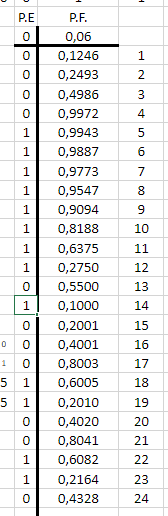

Por lo tanto el numero  5.062323232323232 en binario es
101.000011111111010001101010

**Paso2**
Aqui lo estandarizamos, sin embargo yo lo hago directamente en el algoritmo

**Paso3**
Aqui ya lo almacenamos con el formato

In [ ]:
def decimal_a_binario(decimal, precision):
    binario = ""
    for _ in range(precision):
        decimal *= 2
        bit = int(decimal)
        binario += str(bit)
        decimal -= bit

    return binario
parte_decimal = 0.062323232323232
precision = 24
binario = decimal_a_binario(parte_decimal, precision)
print(binario)

000011111111010001101010


In [ ]:
def REAL2IEEE(REAL):
  """
        La función REAL2IEEE implementa la conversión de un número real en su
        representación binaria de 32 bits, siguiendo el estándar IEEE 754.
        Durante el proceso, se analiza si el número es positivo o negativo
        mediante un condicional. Si es negativo, se establece el bit de signo
        como '1' y se realiza una conversión a binario eliminando el primer
        dígito. En caso contrario, el bit de signo es '0' y la conversión
        a binario se realiza directamente. Posteriormente, se calcula la
        mantisa binaria de la parte fraccionaria utilizando un bucle que
        multiplica por 2 y toma los dígitos enteros resultantes.
        La característica se obtiene sumando un valor fijo y la longitud
        de la parte entera binaria, y se convierte a binario. Finalmente,
        se concatenan todos los componentes para obtener la representación
        final en formato IEEE 754, que se devuelve junto con el sufijo 'B

        Args:
            REAL (float): El número real a convertir.

        Returns:
            str: La representación IEEE 754 del número real seguida de 'B'.
  """

  pe_str, pf_str = str(REAL).split(".")
  if pe_str[0]=='-':
   pe_bin=bin(int(pe_str))[3:]
   signo='1'
  else:
   pe_bin=bin(int(pe_str))[2:]
   signo='0'

  pe,pf, pf_str = 0, int(pf_str)/10**(len(pf_str)),'0.'+pf_str
  #print(pe,pf, pe_bin, pf_str)
  pfb=''
  pe=0
  for i in range(23):
    #print(pe, pf, pfb)
    pe,pf=divmod(pf*2,1)
    #pe,pf  = int(dm[0]),dm[1]
    pfb=pfb+str(int(pe))
  caracteristica=(bin(len(pe_bin)+126)[2:])
  IEEE=signo+caracteristica+pe_bin[1:]+pfb
  return IEEE+'B'
numero_real = 50117/9900


print('El número REAL', numero_real, 'y su representación en formato IEEE754', REAL2IEEE(numero_real))


El número REAL 5.062323232323232 y su representación en formato IEEE754 0100000010100001111111101000110101B


# **Punto** 2:
Haciendo uso de la norma IEEE 754, determine el n ́umero real cuya representaci ́on en el citado formato es:
(40490F F 9)(16) O 40490F F 9H. Muestre los 3 pasos del algoritm


**Paso 1**
Convertir de hexadecimal a binario

El valor es 40490FF9 en base 16

In [ ]:

def hexadecimal_a_binario(num):
    """
    bueno al principio cuando usamos el int(num, 16) lo que hacemos es convertir el valor de entrada
    que en si es una cadena representada en su hexadecimal, ya que especificamos que queremos
    que sea de base 16, seguidamente usamos la función "bin()", la que hace que podamos
    convertir el número decimal en una cadena binaria, despúes, usamos el metodo
    Istrip('0'),para eliminar los ceros iniciales, es decir, busca el primer caracter diferente
    de 0 ( 1) y elimina los 0 que esten a su izquierda y al final ya solo lo imprime en su binario

    Args:
        num (str): El número hexadecimal a convertir.

    Returns:
        str: El número en formato binario, sin ceros a la izquierda.

    Examples:
        input : '40490FF9'
        output: '1000000010010010000111111111001'
    """
    decimal = int(num, 16)
    binario = bin(decimal)[2:]
    binario_sin_ceros = binario.lstrip('0')
    return binario_sin_ceros


numero_hexadecimal = input("Ingresa un número hexadecimal: ")
numero_binario = hexadecimal_a_binario(numero_hexadecimal)
print("El número en binario es:", numero_binario)

Ingresa un número hexadecimal: 40490FF9
El número en binario es: 1000000010010010000111111111001


**Paso 2**
En esta parte lo que hacemos es ubicar los componentesde acuerdo al sistema con
 s el cual en este caso es positivo , exponente y mantiza, eso ya lo especifico
 en el propio excell


**Paso 3**

Calculamos el número real utilizando la formula el resultado es:

x	=	-	1	,	0	0	1	0	0	1	0	0	0	0	1	1	1	1	1	1	1	1	1	1	0	0	1	*	2^-126



#**Punto 3:**
  Escribir su propio código python, en celdas del cuaderno dinámico de Google, para resolver el siguiente problema:

  1. Encontrar la serie, o el polinomio, de Taylor alrededor del punto
  $x_0 = n$ para la función  $f(x) = \sqrt{1 + \frac{x}{3}}$

    
  2. Estimar el valor de $f(n+1)$ en la siguiente forma: iniciar con el grado
     por defecto y agrege términos  hasta que el error relativo sea menor que 1\%  
  
  3. imprimir en cada iteración el polinomio, y las magnitudes de los correspondientes errores absoluto y relativo


In [ ]:
#Primero
from math import factorial
import sympy as sp
def TaylorPoly(a: int, n: int) -> None:
    x = sp.symbols('x')
    f  = (1 + x/3)**(1/2)
    F = f
    T = f.subs(x, a)
    for k in range(1, n+1):
        dfk = sp.diff(f, x)
        T = T + dfk.subs(x, a)*((x - a)**(k))/factorial(k)
        f = dfk

    print("Valor de la serie:", sp.expand(T))

TaylorPoly(a=0, n=3)


Valor de la serie: 0.00231481481481481*x**3 - 0.0138888888888889*x**2 + 0.166666666666667*x + 1


In [ ]:
from math import factorial
import sympy as sp

def TaylorPoly(a: int, n: int) -> None:
    x = sp.symbols('x')
    f = (1 + x/3)**(1/2)
    F = f
    T = f.subs(x, a)
    k = 1

    while True:
        dfk = sp.diff(f, x)
        term = dfk.subs(x, a)*((x - a)**(k))/factorial(k)
        T = T + term
        f = dfk
        k += 1

        # Calcular el error relativo
        relativo = abs(term.subs(x, a+1))/abs(T.subs(x, a+1))
        absoluto = abs(term.subs(x, a+1))
        print("Polinomio en la iteración", k-1, ":", sp.expand(T))
        print("Error relativo en la iteración", k-1, ":", relativo)
        print("Error absoluto en la iteración", k-1, ":", absoluto)
        if relativo < 0.01:
            break
    return T

    print("Valor de la serie:", sp.expand(T))

TaylorPoly(a=0, n=17)

x = sp.symbols('x')
n = 5
error = 1000
while error > 0.01:
    f = (1 + x/3)**(1/2)
    Fx = f.series(x, x0=15, n=n).removeO()
    error = abs(f.subs(x, 15) - Fx.subs(x, 15))/f.subs(x, 15)
    n += 1
n += 1
T = TaylorPoly(a=15, n=n)
valor_estimado = T.subs(x, 17)
print("Valor aproximado de f(17):", valor_estimado)


Polinomio en la iteración 1 : 0.166666666666667*x + 1
Error relativo en la iteración 1 : 0.142857142857143
Error absoluto en la iteración 1 : 0.166666666666667
Polinomio en la iteración 2 : -0.0138888888888889*x**2 + 0.166666666666667*x + 1
Error relativo en la iteración 2 : 0.0120481927710843
Error absoluto en la iteración 2 : 0.0138888888888889
Polinomio en la iteración 3 : 0.00231481481481481*x**3 - 0.0138888888888889*x**2 + 0.166666666666667*x + 1
Error relativo en la iteración 3 : 0.00200400801603206
Error absoluto en la iteración 3 : 0.00231481481481481
Polinomio en la iteración 1 : 0.0680413817439772*x + 1.42886901662352
Error relativo en la iteración 1 : 0.0270270270270270
Error absoluto en la iteración 1 : 0.0680413817439771
Polinomio en la iteración 2 : -0.000945019190888572*x**2 + 0.0963919574706343*x + 1.21623969867359
Error relativo en la iteración 2 : 0.000375516334960571
Error absoluto en la iteración 2 : 0.000945019190888572
Valor aproximado de f(17): 2.58179242950758


#**Punto4**
Grafique la función $f(x) = cos(x)+\frac{ln(x)}{2}-\frac{1}{3}$, en el intervalo $x\in [-(n+1), (n+1)]$ con $n$ igual a su número en la lista de clase.

#**CODIGOS A EJECUTAR**


In [ ]:
def biseccion(f, ak, bk, tol):
  print('\nMÉTODO DE BISECCIÓN\n')
  print('k\t ak\t bk\t ck\tEa\n')
  Ea=abs(bk-ak)
  k=0
  while Ea>=tol:
    ck=(ak+bk)/2
    print(k,"\t",ak,"\t",bk,"\t\t",ck,"\t",Ea)
    if f(ck)==0:
      print("El valor de la raíz es = ", ck)
      return ck
    else:
      if f(ak)*f(ck)>0:
        ak=ck
      else:
        bk=ck
    Ea=abs(bk-ak)
    k+=1
  print("El valor de la raíz es = ", ck)
  return ck

In [ ]:
def newton(f, df, xk, tol, maxiter):
  print('\nMÉTODO DE NEWTON\n')
  for k in range(maxiter):
    xk1 = xk - f(xk)/df(xk)
    Ea=abs(xk1 - xk)
    print(k,"\t\t",xk,"\t\t",Ea)
    if Ea<tol:
      print("El valor de la raiz es =", xk1)
      return xk1#[xk1,k]
    xk=xk1
  return [None]


In [ ]:
def regula_falsi(f, ak, bk, tol):
    print('\nMÉTODO DE Regula Falsi\n')
    print('k\t ak\t bk\t ck\tEa\n')
    Ea = abs(bk - ak)
    k = 0
    c_ant = 0
    while Ea >= tol:
        ck = bk - (f(bk) * (bk - ak)) / (f(bk) - f(ak))
        Ea = abs(ck - c_ant)
        print(k, "\t", ak, "\t", bk, "\t\t", ck, "\t", Ea)
        if f(ck) == 0:
            return ck
        else:
            if f(ak) * f(ck) > 0:
                ak = ck
            else:
                bk = ck
        k += 1
        c_ant = ck
    print("El valor de la raíz es =", ck)
    return ck


In [ ]:
def Secante(f, xk, xk__1, tol, maxiter):
  print('\nMÉTODO DE LA SECANTE\n')
  for k in range(maxiter):
    xk_1 = xk-((f(xk)*(xk-xk__1))/(f(xk)-f(xk__1)))
    Ea=abs(xk_1 - xk)
    print(k,"\t\t",xk,"\t\t",Ea)
    if Ea<tol:
      print("El valor de la raíz es = ", xk_1)
      return xk_1
    xk__1=xk
    xk=xk_1
  return [None]

#**Grafica**
 $f(x) = cos(x)+\frac{ln(x)}{2}-\frac{1}{3}$ en el intervalo $x\in [-(n+1), (n+1)]$
siendo N = 17, entonces  $x\in [-18, 18]$

<lambdifygenerated-42>:2: RuntimeWarning: divide by zero encountered in log
  return (1/2)*log(x) + cos(x) - 0.333333333333333
<lambdifygenerated-42>:2: RuntimeWarning: invalid value encountered in log
  return (1/2)*log(x) + cos(x) - 0.333333333333333


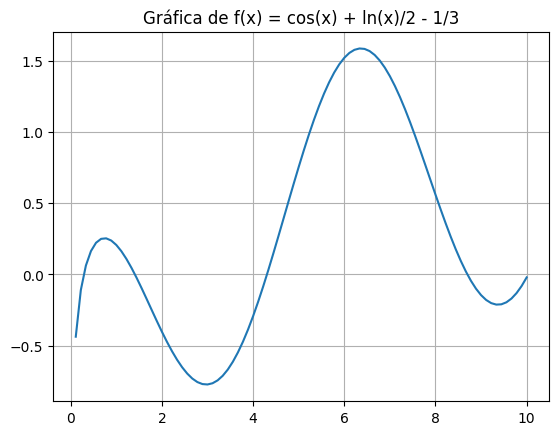

In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

x= sp.symbols('x')
# f= sp.parse_expr(input("Por favor, digita un vector de funciones f(x")) # x*exp(-x**2/10)
f = sp.cos(x) + (sp.ln(x))/2 - 1/3
df = -sp.sin(x) + 1/(2*x)
d2f = df.diff(x)
I=f.integrate(x)
f=sp. lambdify(x, f)
df=sp. lambdify(x, df)
ejex = np.linspace(-1,10, 100)
ejey = f(ejex)
plt.plot(ejex, np.transpose(ejey))
plt.title('Gráfica de f(x) = cos(x) + ln(x)/2 - 1/3')
plt.grid()


**Bisección**


MÉTODO DE BISECCIÓN

k	 ak	 bk	 ck	Ea

0 	 2 	 6 		 4.0 	 4
1 	 4.0 	 6 		 5.0 	 2.0
2 	 4.0 	 5.0 		 4.5 	 1.0
3 	 4.0 	 4.5 		 4.25 	 0.5
4 	 4.25 	 4.5 		 4.375 	 0.25
5 	 4.25 	 4.375 		 4.3125 	 0.125
6 	 4.25 	 4.3125 		 4.28125 	 0.0625
7 	 4.28125 	 4.3125 		 4.296875 	 0.03125
8 	 4.296875 	 4.3125 		 4.3046875 	 0.015625
9 	 4.296875 	 4.3046875 		 4.30078125 	 0.0078125
10 	 4.30078125 	 4.3046875 		 4.302734375 	 0.00390625
11 	 4.302734375 	 4.3046875 		 4.3037109375 	 0.001953125
12 	 4.3037109375 	 4.3046875 		 4.30419921875 	 0.0009765625
13 	 4.30419921875 	 4.3046875 		 4.304443359375 	 0.00048828125
14 	 4.304443359375 	 4.3046875 		 4.3045654296875 	 0.000244140625
15 	 4.3045654296875 	 4.3046875 		 4.30462646484375 	 0.0001220703125
16 	 4.30462646484375 	 4.3046875 		 4.304656982421875 	 6.103515625e-05
17 	 4.304656982421875 	 4.3046875 		 4.3046722412109375 	 3.0517578125e-05
18 	 4.304656982421875 	 4.3046722412109375 		 4.304664611816406 	 1.52587890625e-05


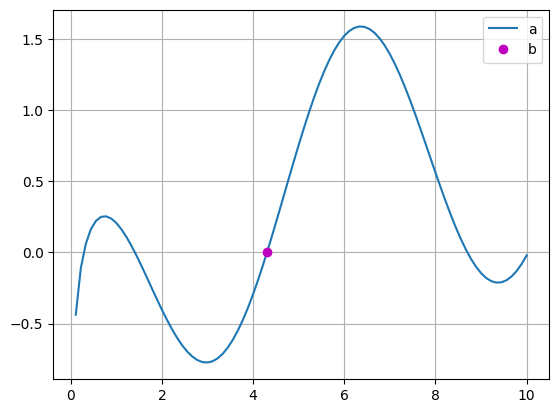

In [ ]:
raiz1 = biseccion(f, 2, 6, 10**-5)
plt.plot(ejex, f(ejex) , raiz1, f(raiz1), 'om')
plt.grid()
plt.legend('abcd')
plt.show()

**Newton**



MÉTODO DE NEWTON

0 		 1 		 0.6061099822324367
1 		 1.6061099822324367 		 0.1914528920762879
2 		 1.4146570901561488 		 0.006910823231738306
3 		 1.4077462669244105 		 1.54434503634171e-05
4 		 1.407730823474047 		 7.829203951814634e-11
El valor de la raiz es = 1.407730823395755


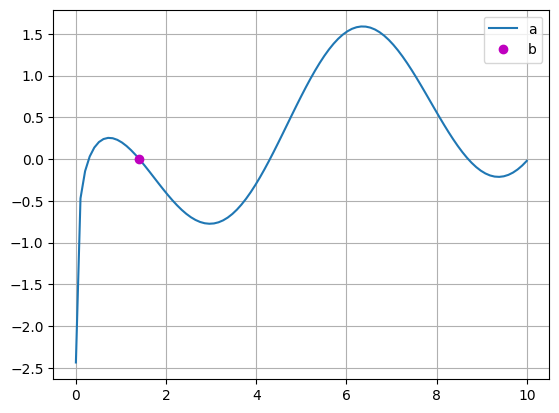

In [ ]:
raiz1 = newton(f, df, 1, 10**-5, maxiter=100)
plt.plot(ejex, f(ejex) , raiz1, f(raiz1), 'om')
plt.grid()
plt.legend('abcd')
plt.show()

**Regula Falsi**


MÉTODO DE Regula Falsi

k	 ak	 bk	 ck	Ea

0 	 2 	 6 		 2.8369374973682873 	 2.8369374973682873
1 	 2.8369374973682873 	 6 		 3.8954958150381986 	 1.0585583176699114
2 	 3.8954958150381986 	 6 		 4.317957660438894 	 0.422461845400695
3 	 3.8954958150381986 	 4.317957660438894 		 4.303270673702018 	 0.014686986736875518
4 	 4.303270673702018 	 4.317957660438894 		 4.304666153346623 	 0.0013954796446045137
5 	 4.304666153346623 	 4.317957660438894 		 4.304669427235568 	 3.273888945720671e-06
El valor de la raíz es = 4.304669427235568


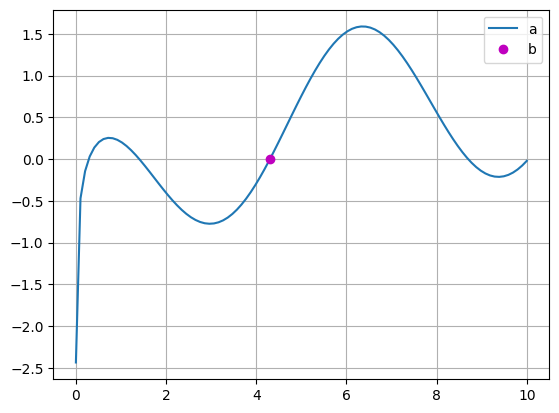

In [ ]:
raiz1 = regula_falsi(f, 2, 6, 10**-5)
plt.plot(ejex, f(ejex) , raiz1, f(raiz1), 'om')
plt.grid()
plt.legend('abcd')
plt.show()

**Secante**


MÉTODO DE LA SECANTE

0 		 2 		 0.8369374973682877
1 		 2.8369374973682877 		 1.7658466534153496
2 		 1.071090843952938 		 0.336284911667307
3 		 1.407375755620245 		 0.0004190152565946015
4 		 1.4077947708768397 		 6.395493795730012e-05
5 		 1.4077308159388824 		 7.456716133447117e-09
El valor de la raíz es =  1.4077308233955985


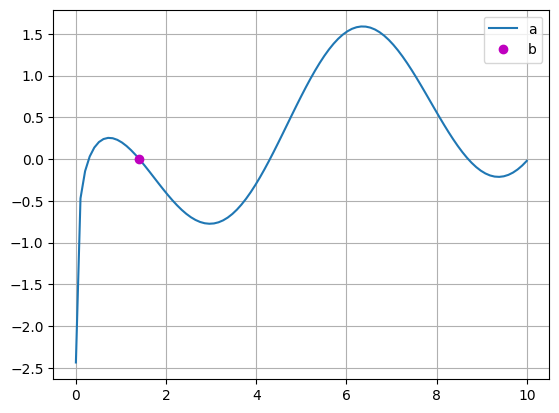

In [ ]:
raiz2 = Secante(f, 2, 6, 10**-5, 10)
plt.plot(ejex, f(ejex) , raiz2, f(raiz2), 'om')
plt.grid()
plt.legend('abcd')
plt.show()

In [ ]:
sp.solveset(f,x,domain=S,Reals)

SyntaxError: ignored